In [1]:
pip install pandas


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd

# Load the CSV files into pandas DataFrames
ada_df = pd.read_csv("ada_Prompt.csv")
curie_df = pd.read_csv("curie_Prompt.csv")
davinci_df = pd.read_csv("davinci_Prompt.csv")
turbo_df = pd.read_csv("turbo_Prompt.csv")

# Add a 'Model' column to identify the source of the data
ada_df['Model'] = 'ada'
curie_df['Model'] = 'curie'
davinci_df['Model'] = 'davinci'
turbo_df['Model'] = 'turbo'


# Combine the DataFrames
combined_df = pd.concat([ada_df, curie_df, davinci_df, turbo_df], ignore_index=True)

# Reorder columns for the desired format
column_order = ['Name', 'Model','Generated_Texts', 'F1_Score', 'Rouge1', 'Rouge2', 'RougeL', 'Length', 'Vec2', 'Bleu']
combined_df = combined_df[column_order]

# Create a new DataFrame with alternating rows of models for each author
alternating_rows = pd.DataFrame()
for name in combined_df['Name'].unique():
    author_data = combined_df[combined_df['Name'] == name]
    for model in author_data['Model'].unique():
        model_data = author_data[author_data['Model'] == model]
        alternating_rows = pd.concat([alternating_rows, model_data], ignore_index=True)

# Save the combined DataFrame to a new CSV file
alternating_rows.to_csv("combined_Prompt.csv", index=False)


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: The markers list has more values (6) than needed (4), which may not be intended.
  func(x=x, y=y, **kwargs)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: The markers list has more values (6) than needed (4), which may not be intended.
  func(x=x, y=y, **kwargs)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: The markers list has more values (6) than needed (4), which may not be intended.
  func(x=x, y=y, **kwargs)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: The markers list has more values (6) than needed (4), which may not be intended.
  func(x=x, y=y, **kwargs)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: The markers l

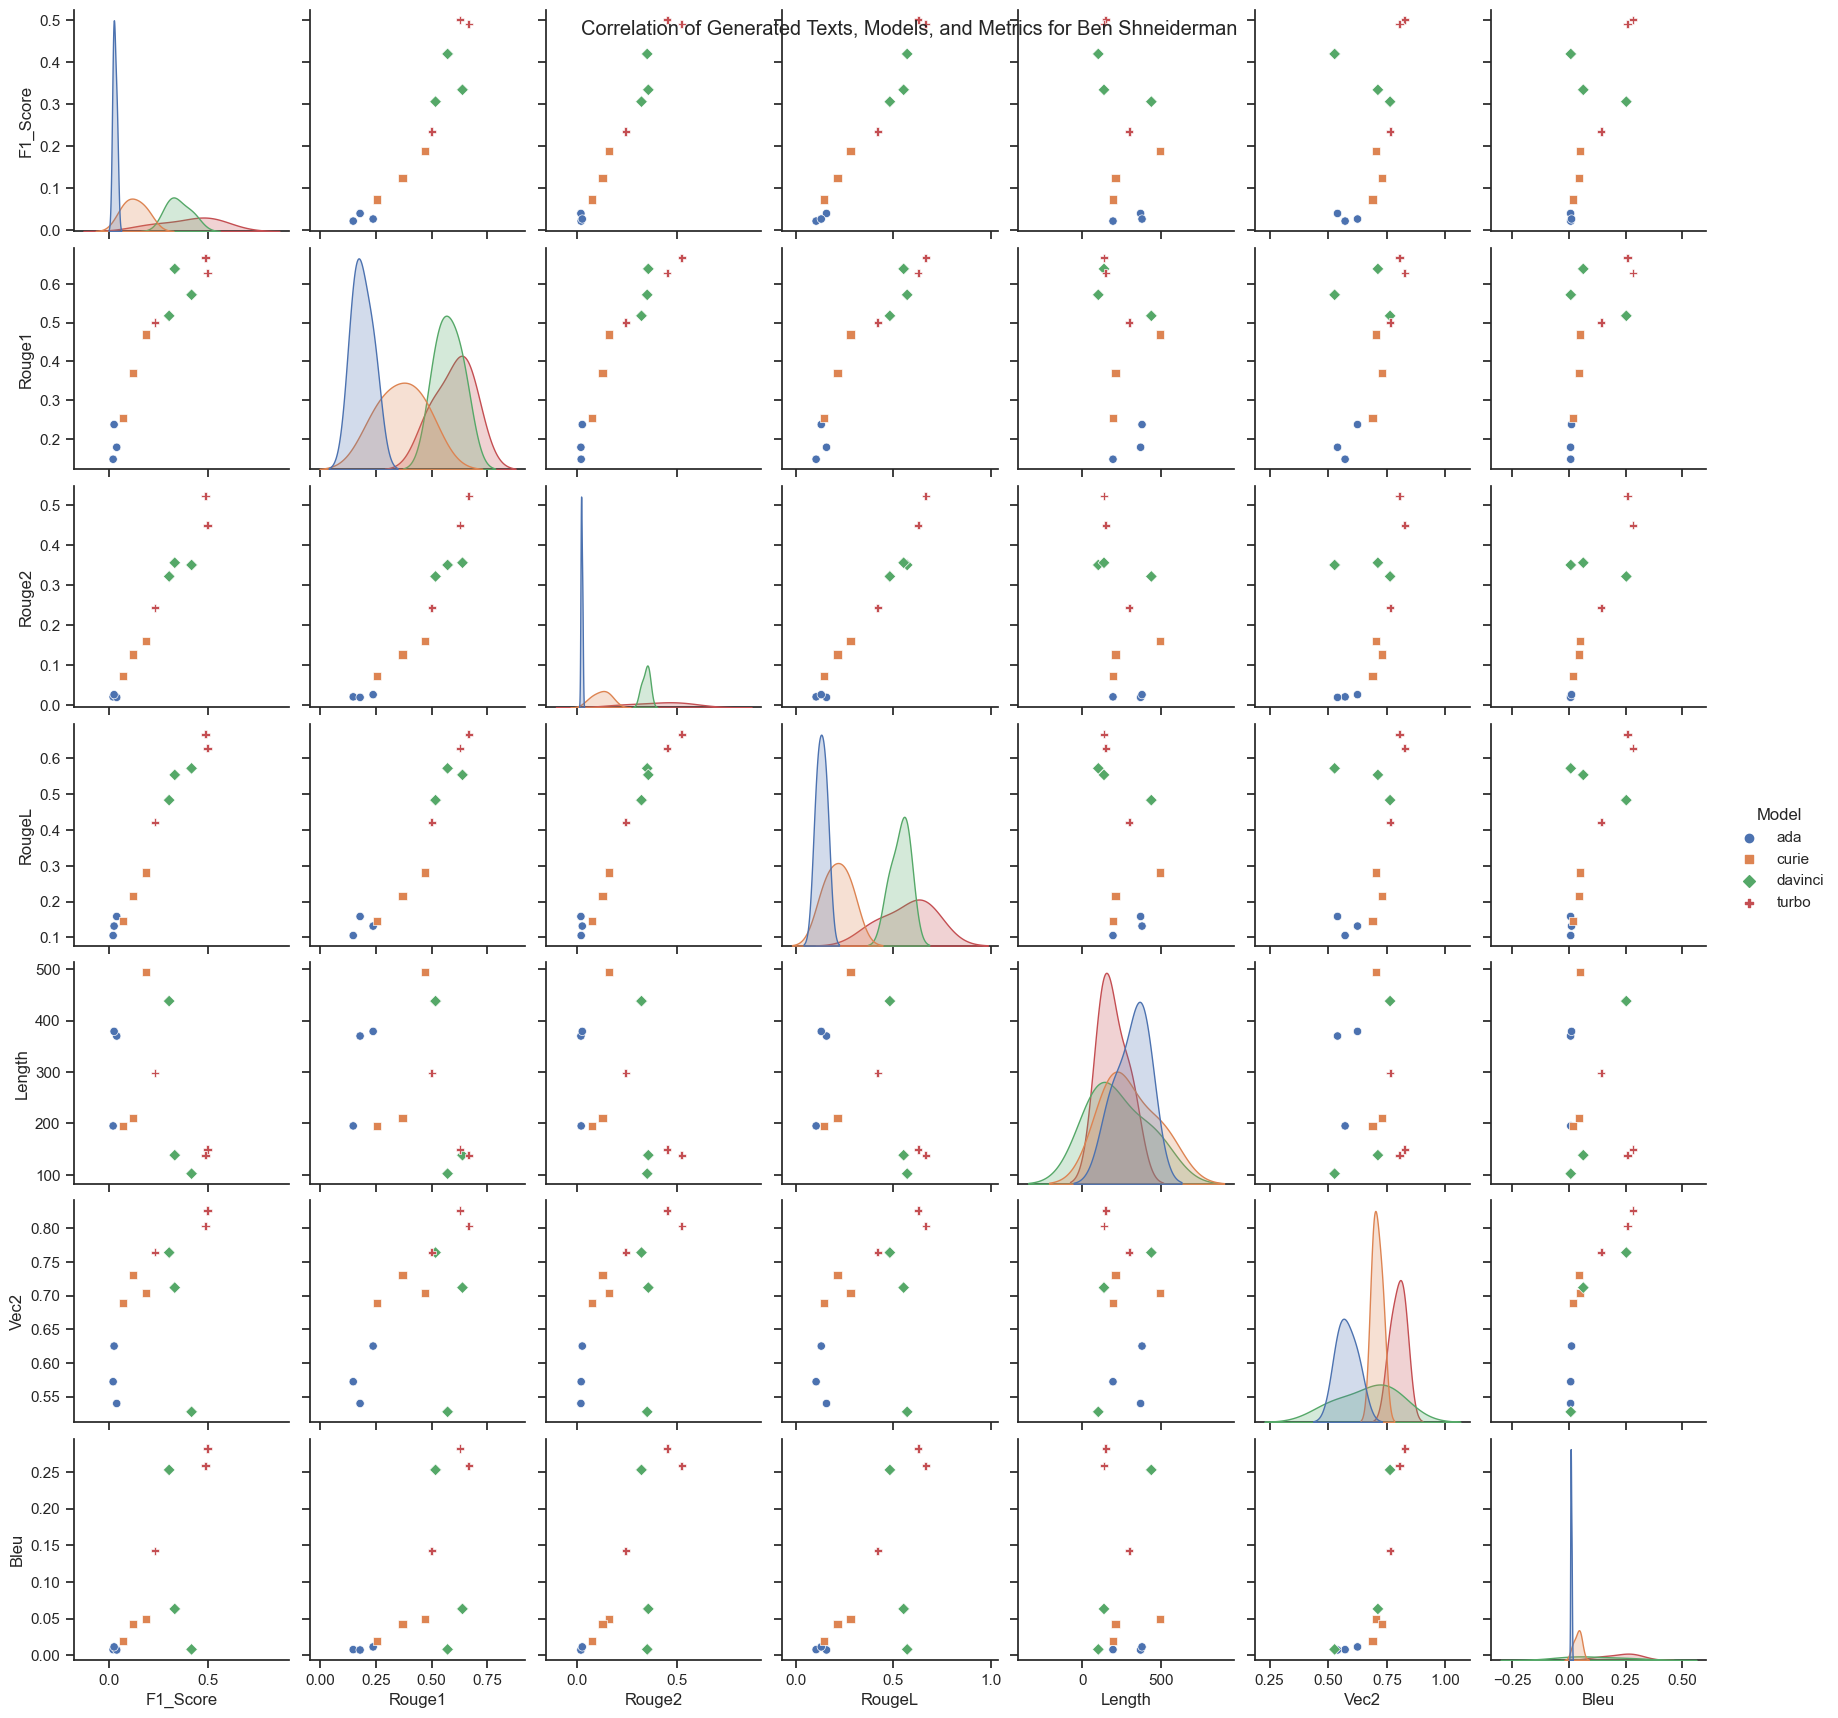

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Load the CSV data
df = pd.read_csv('combined_Prompt.csv')

# Filter data for the "Ben Shneiderman" name
ben_df = df[df['Name'] == 'Ben Shneiderman']

# Define the metrics you want to visualize
metrics = ['F1_Score', 'Rouge1', 'Rouge2', 'RougeL', 'Length', 'Vec2', 'Bleu']

# Create a scatter plot matrix
sns.set(style='ticks')
sns.pairplot(ben_df, vars=metrics, hue='Model', markers=["o", "s", "D", "P", "X", "H"])

# Set the title
plt.suptitle("Correlation of Generated Texts, Models, and Metrics for Ben Shneiderman")

# Display the plot
plt.show()
